In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
from functools import reduce
import os
from subprocess import call
import sys
sys.path.append('../')
from package_global_functions import *

def getTimeEvosPath():
    extSSDpath = getExternalSSDpath()
    if os.path.exists(extSSDpath):
        path = extSSDpath + getProjectFoldername() + '/more_sites/time_evos_dif_cond'
    else:
        path = '/time_evos_dif_cond'
    return path

colorCode_Nsites = {2:{'f0':'xkcd:red', 'f1':'xkcd:green', 'f2':'xkcd:blue'},
                    3:{'f0':'xkcd:red', 'f1':'xkcd:violet', 'f2':'xkcd:green', 'f3':'xkcd:blue'}}

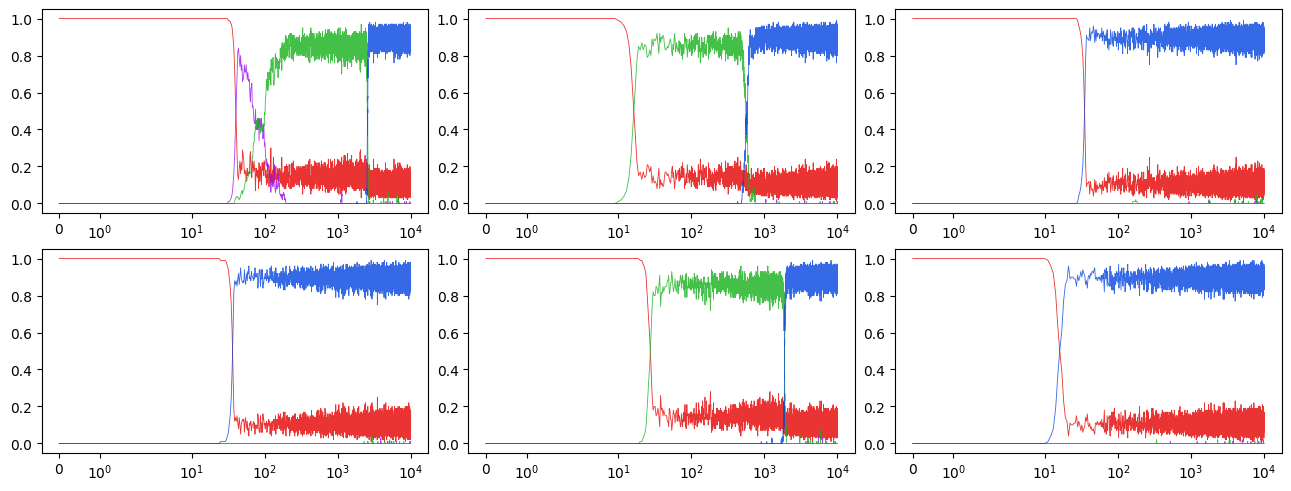

In [9]:
N, Nsites = 100, 3
pis = [0.01, 0.01, 0.01]
qs = [5.0, 7.0, 10.0]
l, ic = 0.99, 'N'

folder = (f"time_evo_csv_N_{N}_Nsites_{Nsites}_pis_{'_'.join([str(pi) for pi in pis])}"
                     f"_qs_{'_'.join([str(q) for q in qs])}_l_{round(l,2)}_ic_{ic}")

files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')

dfs = [pd.read_csv(file) for file in files]

Nplots = 6
start = 18
fig, ax = plt.subplots(2, int(Nplots/2), figsize=(12.8, 4.8), constrained_layout=True)
for i,df in enumerate(dfs[start:start+Nplots]):
     # simulation:
    for f,c in colorCode_Nsites[Nsites].items():
        ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df[f], alpha=0.8, lw=0.6, color=c)
    # details:
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].set_xscale('symlog')
    # ax[int(i//(Nplots/2)),int(i%(Nplots/2))].set_xlim(0,5000)
# fig.savefig(f'time_evos_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_N_{N}_ic_{ic}.png')